In [591]:
import glob
import numpy as np
import scipy.misc
from scipy.special import expit
from matplotlib import pyplot as plt
%matplotlib inline

In [592]:
def load_image(fn, xshift=0, yshift=0, downsample=8, transpose=False):
    x = scipy.misc.imread(fn).astype('float32') / 255.
    m = int(min(x.shape[:2]) / 2)
    xc, yc = [int(s / 2) for s in x.shape[:2]]
    xc += xshift
    yc += yshift
    y = x[xc - m: xc + m, yc - m: yc + m, :]
    if downsample:
        y = y[::downsample, ::downsample, :]
    if transpose:
        y = y.transpose((2, 0, 1))
    assert y.shape[0] == y.shape[1]
    # grey = y.mean(axis=0)
    # flatten = np.ravel(grey)
    return y


def load_all(fns):
    X = np.array([load_image(fn, yshift=-150) for fn in fns])
    return X

In [593]:
X = load_all(sorted(glob.glob("/Users/chrismoody/Downloads/frames/*")))

In [719]:
mask = np.load("./checkpoint2.npz")["mask"]
fg = np.load("./checkpoint2.npz")["fg"]
bg = np.load("./checkpoint2.npz")["bg"][0]

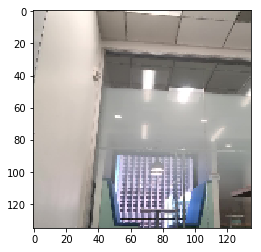

In [720]:
plt.imshow(X[-1])

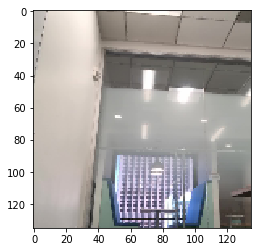

In [721]:
plt.imshow(expit(bg))

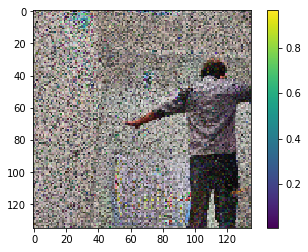

In [722]:
#axs = plt.subplots(1, 2)
plt.imshow(expit(fg[250]))
plt.colorbar()

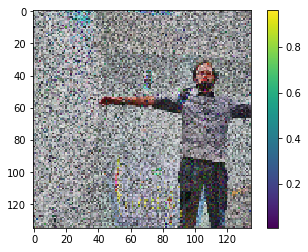

In [723]:
#axs = plt.subplots(1, 2)
plt.imshow(expit(fg[100]))
plt.colorbar()

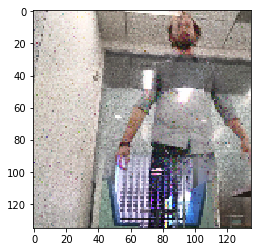

In [724]:
#axs = plt.subplots(1, 2)
f = 50
plt.imshow(expit(bg + fg[f] * mask[f][..., None]))

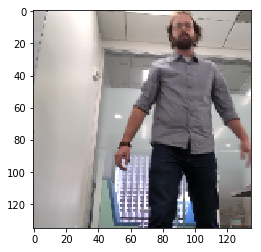

In [725]:
plt.imshow(X[f])

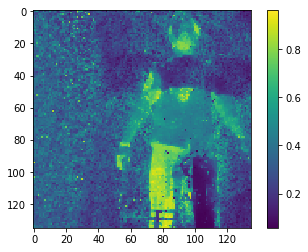

In [726]:
plt.imshow(mask[f])
plt.colorbar()

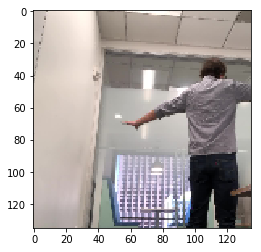

In [727]:
plt.imshow(X[250])

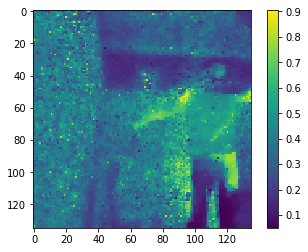

In [728]:
plt.imshow(mask[250])
plt.colorbar()

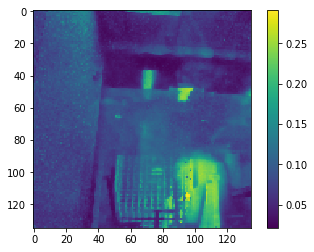

In [729]:
plt.imshow(mask.std(axis=0))
plt.colorbar()